In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_excel('titanic.xls')

In [3]:
print(titanic.shape)
print(titanic.columns)
titanic.head()

(1309, 14)
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic = titanic.set_index('name')
titanic['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

In [4]:
titanic = titanic.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis = 1)
titanic.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [ ]:
titanic = titanic.dropna(axis = 0)
titanic.shape


(1046, 4)

In [ ]:
titanic.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [ ]:
titanic['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

<AxesSubplot: >

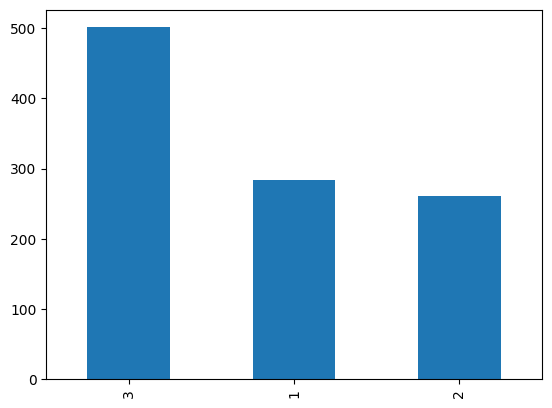

In [ ]:
titanic['pclass'].value_counts().plot.bar()

<AxesSubplot: >

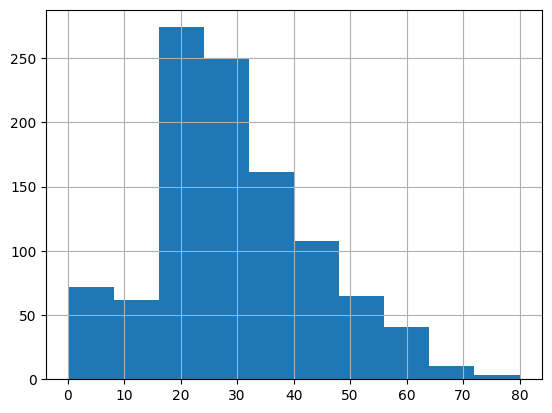

In [ ]:
titanic['age'].hist()

Analyse par groupe 

In [ ]:
titanic.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

Derrière le DataFrame

In [ ]:
titanic.loc[titanic['age'] <= 20, 'age'] = 0
titanic.loc[(titanic['age'] > 20) & (titanic['age'] <= 30), 'age'] = 1
titanic.loc[(titanic['age'] > 30) & (titanic['age'] <= 40), 'age'] = 2
titanic.loc[titanic['age'] > 0, 'age'] = 3

In [ ]:
titanic['age'].value_counts()

0.0    1046
Name: age, dtype: int64

In [ ]:
titanic[titanic['age'] < 18]

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000
...,...,...,...,...
1265,3,0,female,10.0000
1275,3,0,male,16.0000
1279,3,0,female,14.0000
1300,3,1,female,15.0000


In [ ]:
titanic[titanic['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [ ]:
titanic[titanic['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

iloc = indexing comme dans numpy et loc = en travaillant sur les columns

In [ ]:
titanic.iloc[0:2, 0:2]

,pclass,survived
0,1,1
1,1,1


In [ ]:
titanic.loc[0:2, ['age', 'sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female


### Problème de Time Series

Les données du bitcoin

In [ ]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-10,47494.953125,48723.902344,46899.835938,47357.207031,47357.207031,34176954639
2021-10-11,47324.820313,50008.027344,47119.632813,49755.960938,49755.960938,36904742451
2021-10-12,49792.347656,49838.777344,47242.480469,48601.886719,48601.886719,35630095368
2021-10-13,48599.457031,49756.468750,47064.277344,49497.367188,49497.367188,35944622965
2021-10-14,49472.996094,50443.347656,49136.925781,49455.808594,49455.808594,31591335859


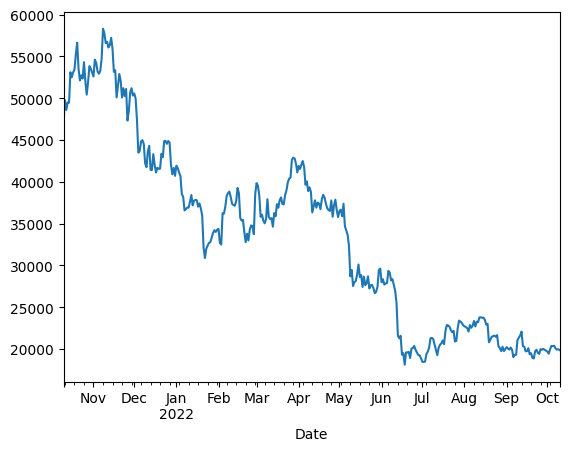

In [ ]:
bitcoin['Close'].plot()
plt.show()

In [ ]:
bitcoin.index

DatetimeIndex(['2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15', '2021-10-16', '2021-10-17',
               '2021-10-18', '2021-10-19',
               ...
               '2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04',
               '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
               '2022-10-09', '2022-10-10'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

C:\Users\delph\AppData\Local\Temp\ipykernel_16752\902804964.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2022-07']['Close'].plot()


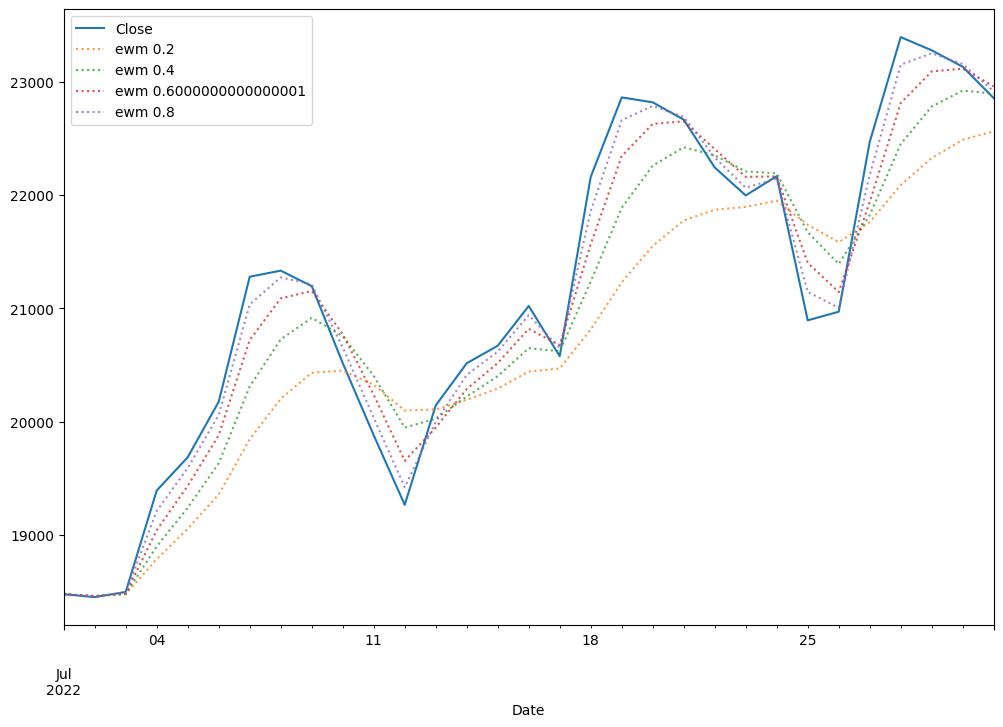

In [ ]:
plt.figure(figsize=(12, 8))
bitcoin['2022-07']['Close'].plot()
# fenetre de 7 jours
# bitcoin.loc['2022-07', 'Close'].rolling(window=7).mean().plot(label="Moving average", lw=3, ls=':', alpha=0.8)
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2022-07', 'Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls=':', alpha=0.8)
plt.legend()
plt.show()

Par mois

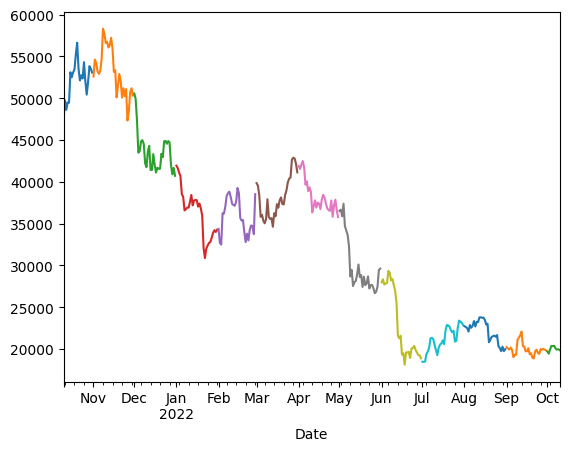

In [ ]:
bitcoin['2021':'2022']['Close'].resample('M').plot()
plt.show()

Par mois en moyenne

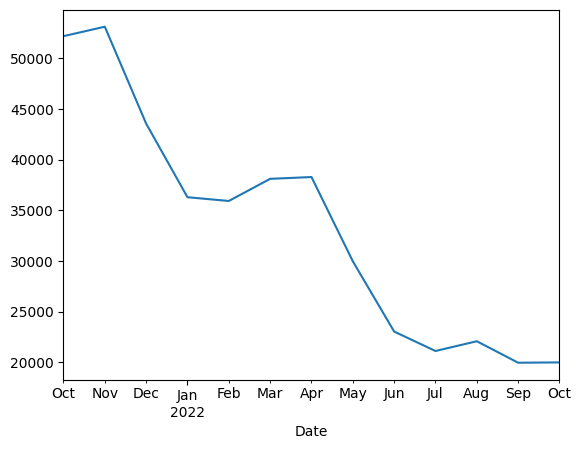

In [ ]:
bitcoin['2021':'2022']['Close'].resample('M').mean().plot()
plt.show()

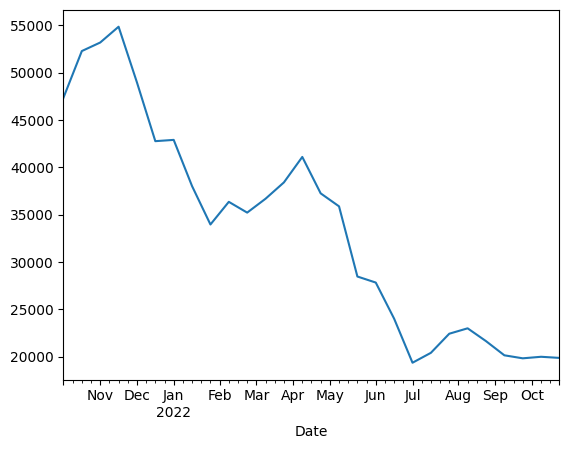

In [ ]:
bitcoin['2021':'2022']['Close'].resample('2W').mean().plot()
plt.show()

Bitcoin est volatile = std() = écart type

Par semaine

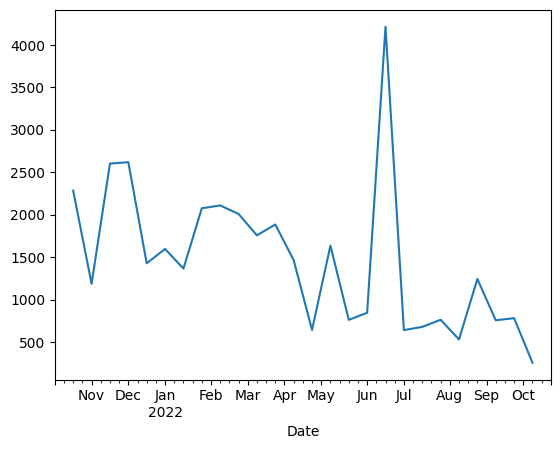

In [ ]:
bitcoin['2021':'2022']['Close'].resample('2W').std().plot()
plt.show()

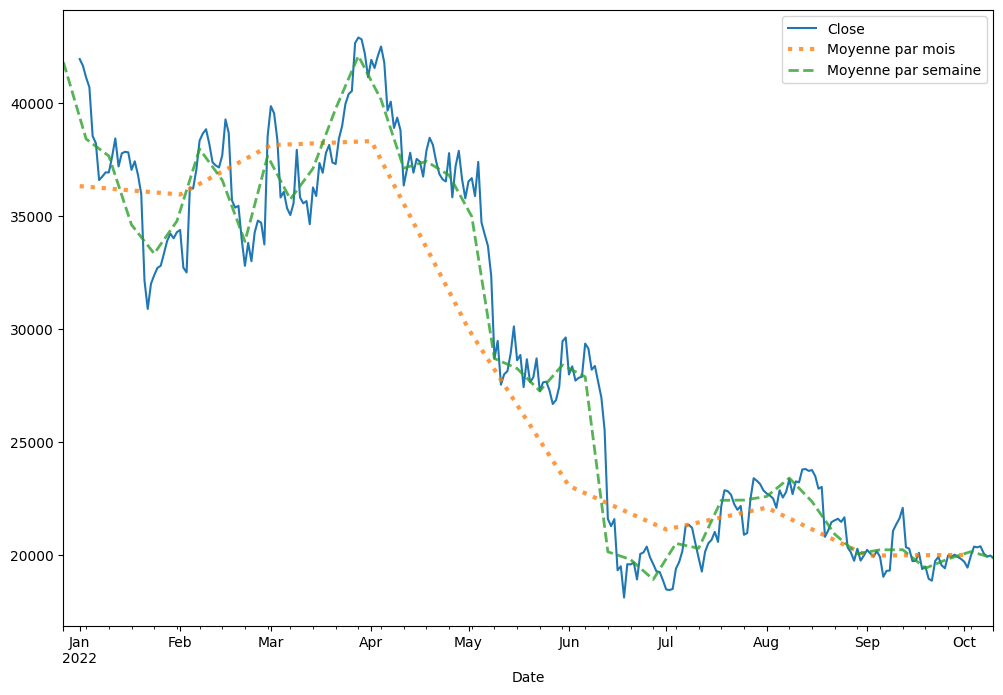

In [ ]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2022', 'Close'].plot()
bitcoin.loc['2022', 'Close'].resample('M').mean().plot(label="Moyenne par mois", lw=3, ls=':', alpha=0.8)
bitcoin.loc['2022', 'Close'].resample('W').mean().plot(label="Moyenne par semaine", lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

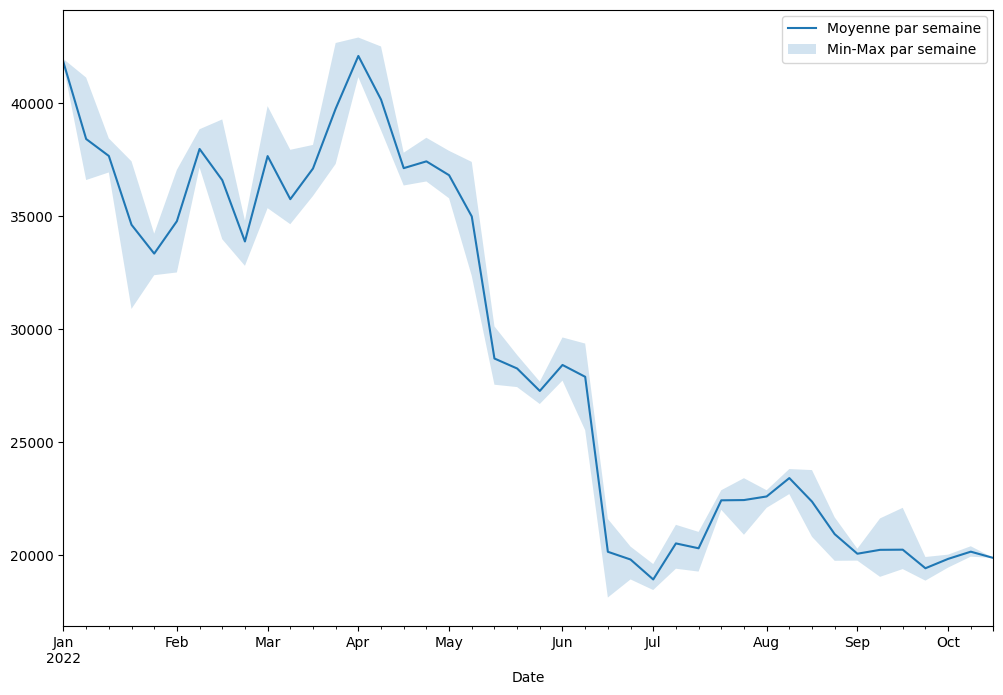

In [ ]:
m = bitcoin.loc['2022', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
plt.figure(figsize=(12, 8))
m['mean']['2022'].plot(label="Moyenne par semaine")
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label="Min-Max par semaine")
plt.legend()
plt.show()

### Assembler des Datasets

In [ ]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

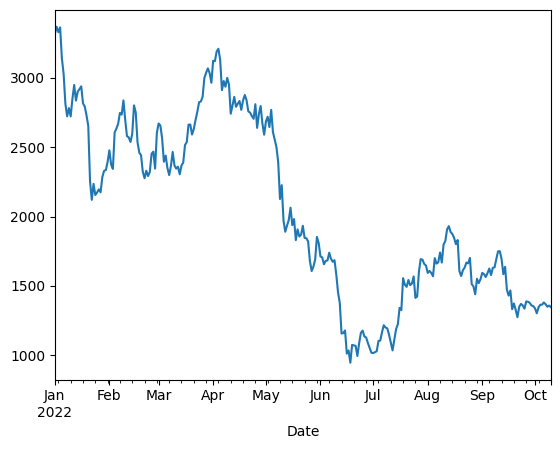

In [ ]:
ethereum.loc['2022']['Close'].plot()
plt.show()

inner = seulement index en commun
outer = etendre sur toute les étendues index

In [ ]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner', suffixes=('_btc', '_eth'))

<AxesSubplot: xlabel='Date'>

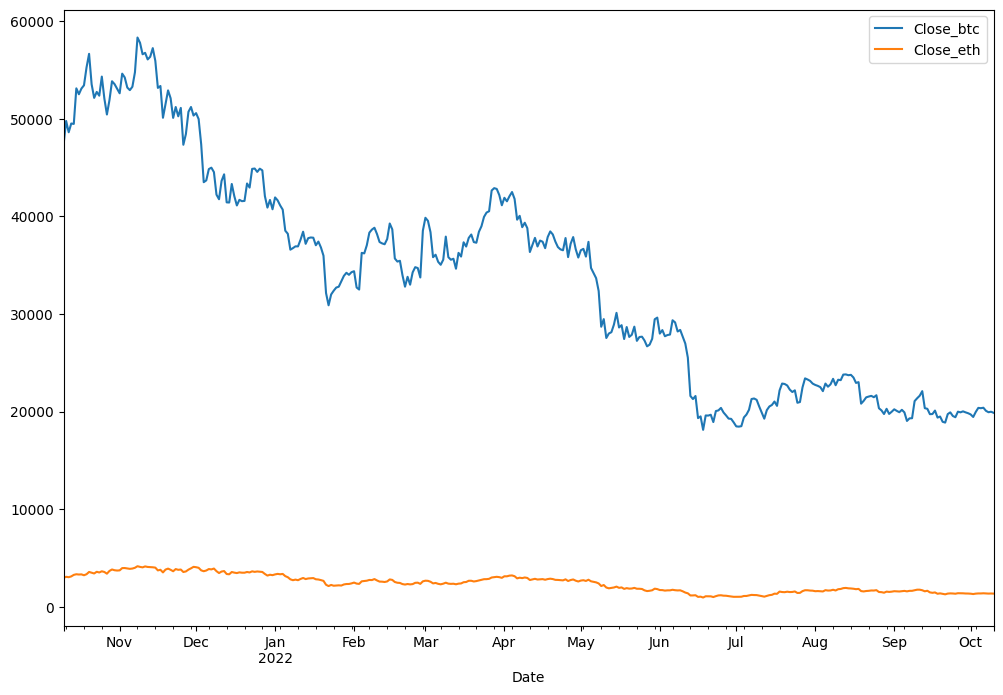

In [ ]:
btc_eth[['Close_btc', 'Close_eth']].plot(figsize=(12, 8))

Il ne partage pas la même échelle

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

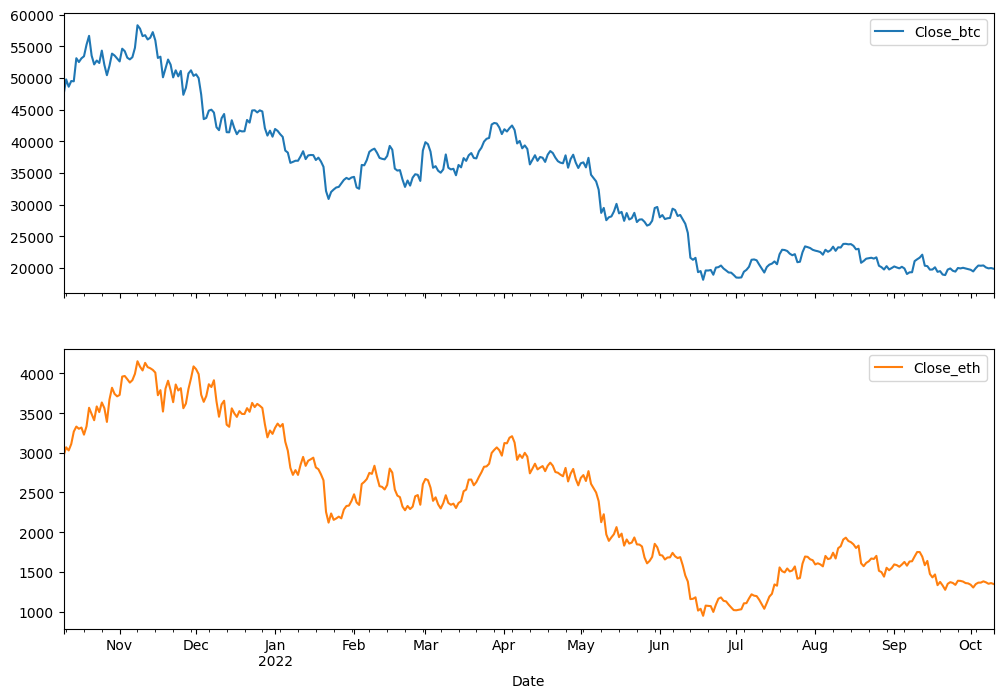

In [ ]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

Matrice de corrélation

In [ ]:
correlations = btc_eth[['Close_btc', 'Close_eth']].loc['2022'].corr()
correlations

,Close_btc,Close_eth
Close_btc,1.00000,0.96446
Close_eth,0.96446,1.00000


<AxesSubplot: >

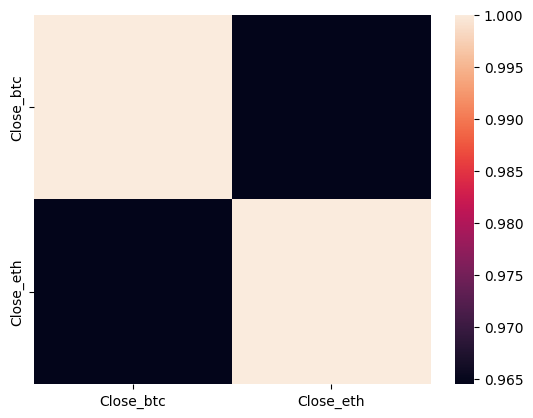

In [ ]:
import seaborn as sns

sns.heatmap(correlations)

Variations dans le cours du bitcoin

<AxesSubplot: xlabel='Date'>

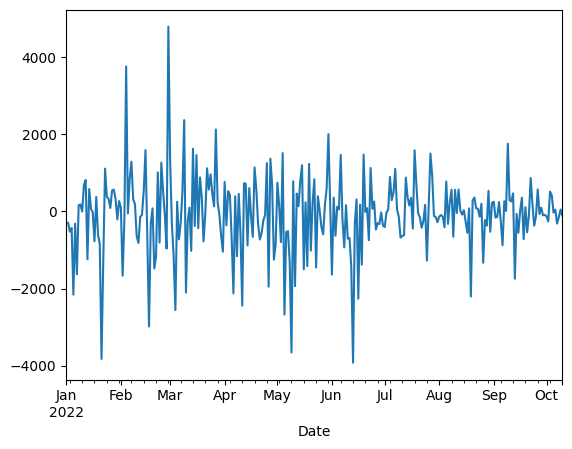

In [ ]:
bitcoin['Close']['2022'].diff().plot()